# Demonstration of Wasserstein Discriminant Analysis

In [2]:
import numpy as np
import matplotlib.pylab as pl
import ot
from ot.datasets import get_1D_gauss as gauss
from ot.dr import wda

### Generate dataset

In [3]:
n=1000 # nb samples in source and target datasets
nz=0.2
xs,ys=ot.datasets.get_data_classif('3gauss',n,nz)
xt,yt=ot.datasets.get_data_classif('3gauss',n,nz)

nbnoise=8

xs=np.hstack((xs,np.random.randn(n,nbnoise)))
xt=np.hstack((xt,np.random.randn(n,nbnoise)))


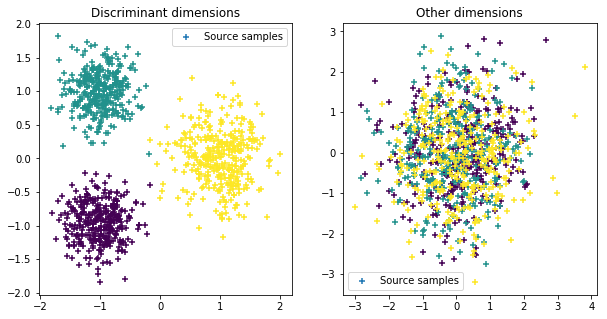

In [6]:
pl.figure(1,(10,5))

pl.subplot(1,2,1)
pl.scatter(xt[:,0],xt[:,1],c=ys,marker='+',label='Source samples')
pl.legend(loc=0)
pl.title('Discriminant dimensions')

pl.subplot(1,2,2)
pl.scatter(xt[:,2],xt[:,3],c=ys,marker='+',label='Source samples')
pl.legend(loc=0)
pl.title('Other dimensions')
pl.show()

### Compute WDA

In [7]:
p=2
reg=1
k=10
maxiter=100

P,proj = wda(xs,ys,p,reg,k,maxiter=maxiter)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+3.9157922235693188e-01	5.71597367e-01
    2	+1.3819067207672747e-01	1.45380541e-01
    3	+1.3514783259634658e-01	1.56401980e-01
    4	+1.2366637320576453e-01	1.39774670e-01
    5	+8.7917719796676133e-02	1.02114467e-01
    6	+8.4889100715160537e-02	1.00158402e-01
    7	+7.4573884583769998e-02	6.88332229e-02
    8	+7.1655335462508282e-02	5.32376275e-02
    9	+7.0479018645171101e-02	4.37283221e-02
   10	+6.8400612315063808e-02	6.65409711e-03
   11	+6.8364466366572729e-02	2.96611209e-03
   12	+6.8355577537242695e-02	8.64992482e-05
   13	+6.8355570205523991e-02	1.40803543e-05
   14	+6.8355570014368830e-02	2.34884058e-06
   15	+6.8355570008960018e-02	2.23203146e-07
Terminated - min grad norm reached after 15 iterations, 7.87 seconds.



### Project and plot samples

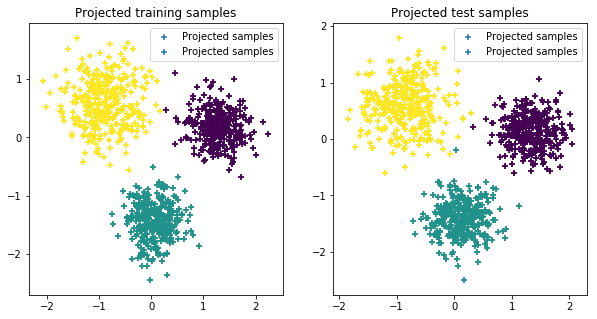

In [9]:
# data projection (also removes center)
xsp=proj(xs)
xtp=proj(xt)

pl.figure(1,(10,5))

pl.subplot(1,2,1)
pl.scatter(xsp[:,0],xsp[:,1],c=ys,marker='+',label='Projected samples')
pl.legend(loc=0)
pl.title('Projected training samples')


pl.subplot(1,2,2)
pl.scatter(xtp[:,0],xtp[:,1],c=ys,marker='+',label='Projected samples')
pl.legend(loc=0)
pl.title('Projected test samples')
pl.show()